In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [4]:
dados = pd.read_csv('/content/Doencadocoracao_Binaria.csv', sep=',') # carregar o arquivo
dados

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [113]:
x = dados.values[:,0:13] # separação das características
y= dados.values[:,13] # separação da saida - 0 e 1

In [177]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler(feature_range = (0,1))
rescaledx = Scaler.fit_transform(x)
print(rescaledx[:,:]) 

[[0.70833333 1.         1.         ... 0.         0.         0.33333333]
 [0.16666667 1.         0.66666667 ... 0.         0.         0.66666667]
 [0.25       0.         0.33333333 ... 1.         0.         0.66666667]
 ...
 [0.8125     1.         0.         ... 0.5        0.5        1.        ]
 [0.58333333 1.         0.         ... 0.5        0.25       1.        ]
 [0.58333333 0.         0.33333333 ... 0.5        0.25       0.66666667]]


In [114]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [203]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.20, random_state=4) # separação de 80% arquivo para treino

In [207]:
model = Sequential()
model.add(Dense(15,activation='tanh',kernel_initializer='he_normal',input_shape=(13,)))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [208]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [233]:
history = model.fit(x_treino,y_treino, validation_data=(x_teste,y_teste),epochs= 500,batch_size=64,verbose=1)

Epoch 1/500
4/4 [==============================] - 0s 25ms/step - loss: 0.3467 - accuracy: 0.8636 - val_loss: 0.3406 - val_accuracy: 0.8525
Epoch 2/500
4/4 [==============================] - 0s 9ms/step - loss: 0.3467 - accuracy: 0.8636 - val_loss: 0.3394 - val_accuracy: 0.8525
Epoch 3/500
4/4 [==============================] - 0s 10ms/step - loss: 0.3465 - accuracy: 0.8595 - val_loss: 0.3372 - val_accuracy: 0.8525
Epoch 4/500
4/4 [==============================] - 0s 9ms/step - loss: 0.3457 - accuracy: 0.8595 - val_loss: 0.3353 - val_accuracy: 0.8689
Epoch 5/500
4/4 [==============================] - 0s 9ms/step - loss: 0.3454 - accuracy: 0.8595 - val_loss: 0.3333 - val_accuracy: 0.8689
Epoch 6/500
4/4 [==============================] - 0s 8ms/step - loss: 0.3450 - accuracy: 0.8554 - val_loss: 0.3318 - val_accuracy: 0.8689
Epoch 7/500
4/4 [==============================] - 0s 9ms/step - loss: 0.3446 - accuracy: 0.8554 - val_loss: 0.3301 - val_accuracy: 0.8689
Epoch 8/500
4/4 [========

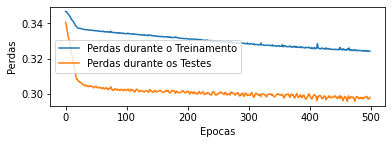

In [234]:
plt.subplot(211)
#plt.title=('Grafico de custo') # Erros
plt.plot(history.history['loss'], label='Perdas durante o Treinamento')
plt.plot(history.history['val_loss'], label='Perdas durante os Testes')
plt.xlabel('Epocas')
plt.ylabel('Perdas')
plt.legend()
plt.show()

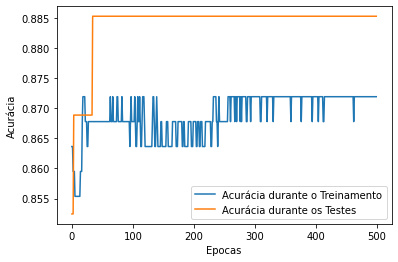

In [235]:
#plt.title('Grafico de Desempenho') # Erros
plt.plot(history.history['accuracy'], label='Acurácia durante o Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia durante os Testes')
plt.xlabel('Epocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()